In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
df=pd.get_dummies(df,drop_first=True)

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
df = norm_func(df.iloc[:,:])
df.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
390,0.336202,0.316327,0.545455,0.310345,0.102204,0.520958,0.763636,0.250,0.0,1.0,1.0,1.0
391,0.374923,0.775510,0.424242,0.000000,0.078156,0.598802,0.563636,0.750,0.0,0.0,1.0,0.0
392,0.278427,0.530612,0.212121,0.448276,0.611222,0.634731,0.163636,0.375,0.0,0.0,1.0,1.0
393,0.342348,0.326531,0.303030,0.344828,0.032064,0.574850,0.090909,0.875,0.0,1.0,0.0,1.0
394,0.328826,0.540816,0.373737,0.655172,0.713427,0.688623,0.145455,0.750,0.0,0.0,1.0,1.0
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,0.0,1.0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0
399,0.596804,0.581633,0.161616,0.000000,0.034068,0.574850,0.436364,0.750,1.0,0.0,1.0,1.0


In [9]:
X=df.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0


In [11]:
y=df['Sales']
y

0      0.583897
1      0.689613
2      0.618316
3      0.454825
4      0.255071
         ...   
395    0.772588
396    0.377382
397    0.455439
398    0.365089
399    0.596804
Name: Sales, Length: 400, dtype: float64

# Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [35]:
model.score(X_train,y_train)

0.6473993914039108

In [36]:
#Find the accuracy
model.score(X_test,y_test)

0.2930337777140828

In [37]:
# Since data is small finding best randon state value for better accuracy
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test,y_test))

In [38]:
np.argmax(scores)

463

In [39]:
scores[np.argmax(scores)]

0.6152579147220458

In [41]:
model.feature_importances_

array([0.11645794, 0.05539557, 0.10431722, 0.04176664, 0.25023732,
       0.08999752, 0.07213681, 0.2467967 , 0.01164129, 0.00857663,
       0.00267635])

In [45]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature_Importance'])

,Feature_Importance
CompPrice,0.116458
Income,0.055396
Advertising,0.104317
Population,0.041767
Price,0.250237
Age,0.089998
Education,0.072137
ShelveLoc_Good,0.246797
ShelveLoc_Medium,0.011641
Urban_Yes,0.008577


In [66]:
df1=pd.read_csv('Company_Data.csv')
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df1['ShelveLoc']=label_encoder.fit_transform(df1['ShelveLoc'])
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No


In [74]:
df1=pd.get_dummies(df1,drop_first=True)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [76]:
X_1=df1.drop(columns=['ShelveLoc'],axis=1)
X_1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0


In [77]:
y_1=df1['ShelveLoc']

In [78]:
X_1_train, X_1_test,y_1_train,y_1_test = train_test_split(X_1,y_1, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria C5.0

In [79]:
from sklearn.tree import  DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model1.fit(X_1_train,y_1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.4, 190.26, 'X[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [83, 67, 170]'),
 Text(83.7, 135.9, 'X[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [55, 0, 53]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [16, 0, 2]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [39, 0, 51]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.996\nsamples = 84\nvalue = [39, 0, 45]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [28, 67, 117]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [25, 31, 104]'),
 Text(188.32500000000002, 27.1800

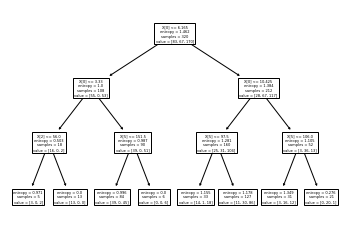

In [80]:
from sklearn import tree
tree.plot_tree(model1)

In [97]:
X_1.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [94]:
b=list(y_1.unique())
b

[0, 1, 2]

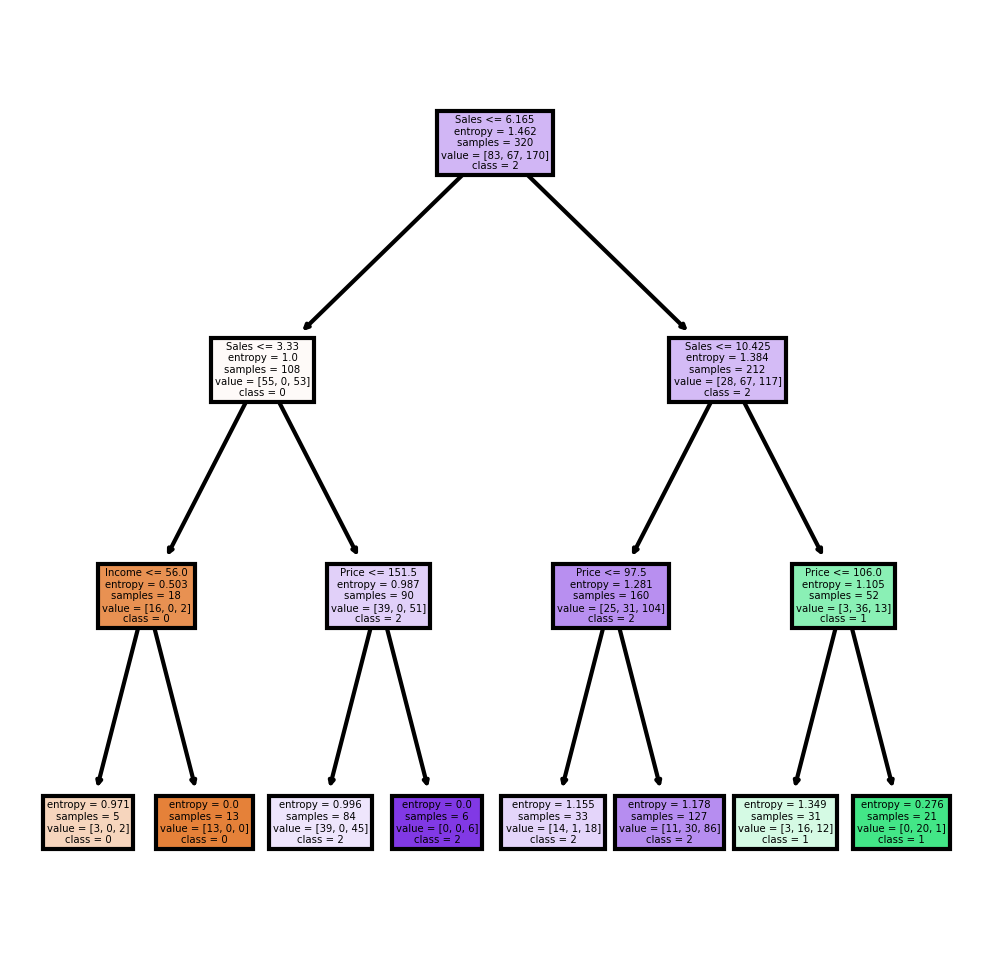

In [99]:
fn=['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [101]:
ypred=model1.predict(X_1_test)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_1_test,ypred))

              precision    recall  f1-score   support

           0       0.25      0.08      0.12        13
           1       0.62      0.44      0.52        18
           2       0.65      0.84      0.73        49

    accuracy                           0.62        80
   macro avg       0.51      0.45      0.46        80
weighted avg       0.58      0.62      0.58        80



In [106]:
model1.score(X_1_train,y_1_train)

0.646875

In [107]:
model1.score(X_1_test,y_1_test)

0.625

In [108]:
# Feature Selection
model1.feature_importances_

array([0.74692591, 0.        , 0.02920061, 0.        , 0.        ,
       0.22387348, 0.        , 0.        , 0.        , 0.        ])

In [110]:
pd.DataFrame(index=X_1.columns,data=model1.feature_importances_,columns=['Feature_Importance'])

,Feature_Importance
Sales,0.746926
CompPrice,0.000000
Income,0.029201
Advertising,0.000000
Population,0.000000
Price,0.223873
Age,0.000000
Education,0.000000
Urban_Yes,0.000000
US_Yes,0.000000


In [111]:
#dropping columns
df1=df1.drop(columns=['CompPrice', 'Income', 'Advertising', 'Population',
       'Age', 'Education', 'Urban_Yes', 'US_Yes'])

In [112]:
df1.head()

,Sales,Price,ShelveLoc
0,9.50,120,0
1,11.22,83,1
2,10.06,80,2
3,7.40,97,2
4,4.15,128,0


In [113]:
X_2=df1.drop(columns=['ShelveLoc'],axis=1)
X_2.head()

,Sales,Price
0,9.50,120
1,11.22,83
2,10.06,80
3,7.40,97
4,4.15,128


In [114]:
y_2=df1['ShelveLoc']

In [115]:
X_2_train, X_2_test,y_2_train,y_2_test = train_test_split(X_2,y_2, test_size=0.2,random_state=40)

In [116]:
from sklearn.tree import  DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(X_2_train,y_2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

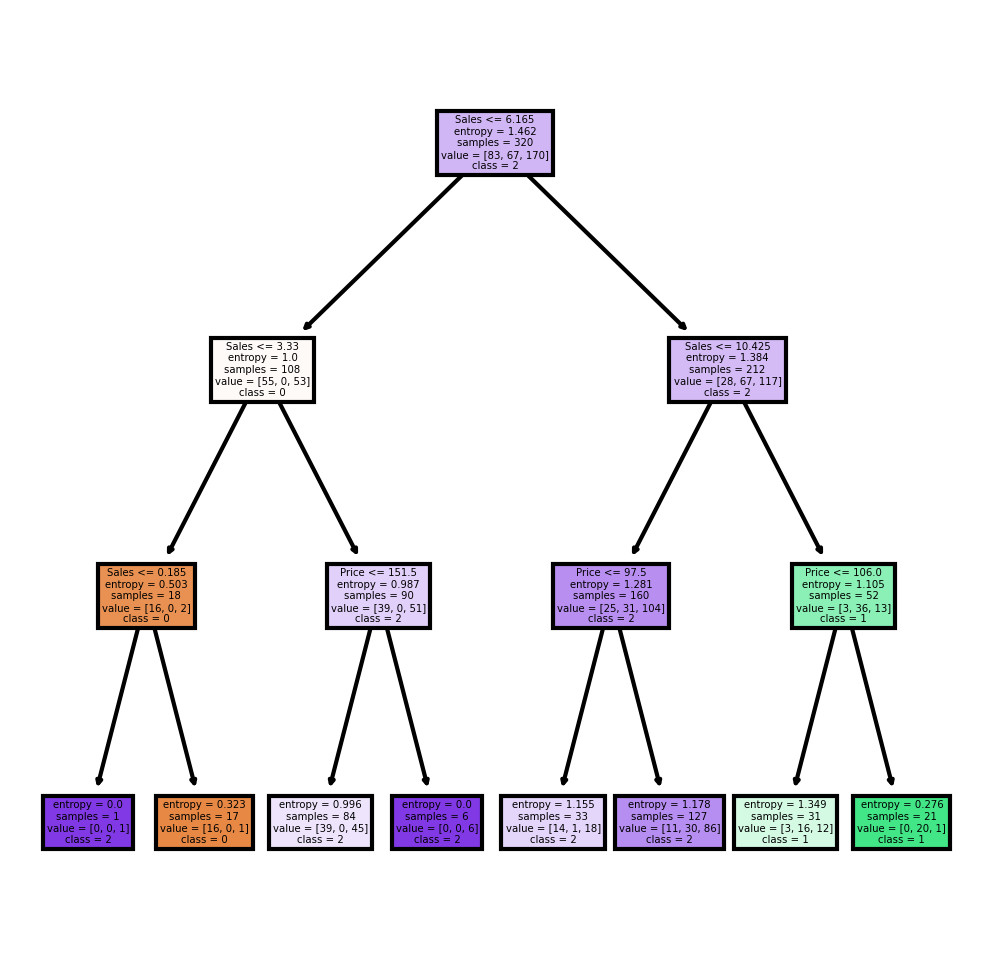

In [117]:
fn=['Sales', 'Price']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [118]:
ypred=model2.predict(X_2_test)

In [119]:
model2.score(X_2_train,y_2_train)

0.65

In [120]:
model2.score(X_2_test,y_2_test)

0.6375